In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
import matplotlib as mpl
sns.set_theme()

In [26]:
server_lru = pd.read_csv(f'server_lru_CS.txt', sep='|', names=['t', 'srv_addr', 'clt_addr', 'bytes', 'CS'], header=None)
server_lra = pd.read_csv(f'server_lru_P2P.txt', sep='|', names=['t', 'srv_addr', 'clt_addr', 'bytes', 'P2P'], header=None)

node_lru = pd.read_csv(f'node_lru_CS.txt', sep='|', names=['t', 'clt_addr', 'start_up_delay', 'cache_size', 'cache_hit', 'server_hit', 'peer_hit', 'total', 'CS'], header=None)
node_lra = pd.read_csv(f'node_lru_P2P.txt', sep='|', names=['t', 'clt_addr', 'start_up_delay', 'cache_size', 'cache_hit', 'server_hit', 'peer_hit', 'total', 'P2P'], header=None)

srvs = [server_lru, server_lra]
peers = [node_lru, node_lra]

for d in srvs + peers:
  d['s'] = d['t'].round()
  d['s'] = d['s'] - d['s'].min()

In [282]:
cs = [50000, 100000, 500000]
srvs = []
peers = []
for v in cs:
  s_cs = pd.read_csv(f'server_no_p2p_{v}.txt', sep='|', names=['t', 'srv_addr', 'clt_addr', 'bytes', 'no_p2p', f'{v}'], header=None)
  s_p2p = pd.read_csv(f'server_p2p_{v}.txt', sep='|', names=['t', 'srv_addr', 'clt_addr', 'bytes', 'p2p', f'{v}'], header=None)

  p_cs = pd.read_csv(f'node_no_p2p_{v}.txt', sep='|', names=['t', 'clt_addr', 'start_up_delay', 'no_p2p', f'{v}'], header=None)
  p_p2p = pd.read_csv(f'node_p2p_{v}.txt', sep='|', names=['t', 'clt_addr', 'start_up_delay', 'p2p', f'{v}'], header=None)

  srvs.append(s_cs)
  srvs.append(s_p2p)
  
  peers.append(p_cs)
  peers.append(p_p2p)

all = srvs + peers

for d in all:
  d['s'] = d['t'].round()
  d['s'] = d['s'] - d['s'].min()
  


In [283]:
for srv in srvs:
  tot_t = srv.s.max() - srv.s.min()
  avg_bps = srv.bytes.sum() / tot_t
  print(avg_bps)

31002375.032258064
13724520.636363637
59548910.13333333
13191727.48
236185646.75
13492225.47826087


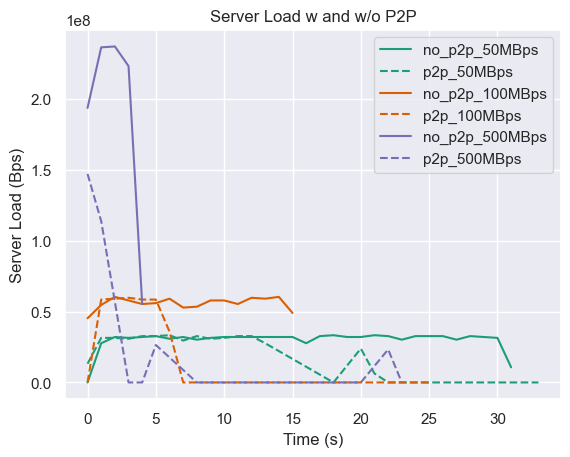

In [284]:
colors = mpl.colormaps['Dark2'].colors
for i, srv in enumerate(srvs):
  if 'no_p2p' in srv.columns:
    grouped = srv.groupby('s')['bytes'].sum().plot(label=f'no_p2p_{int(int(srv.columns[5]) / 1000)}MBps', color=colors[int(i/2)])
  else:
    grouped = srv.groupby('s')['bytes'].sum().plot(label=f'p2p_{int(int(srv.columns[5]) / 1000)}MBps', style='--', color=colors[int(i/2)])

plt.legend()
plt.title('Server Load w and w/o P2P')
plt.ylabel('Server Load (Bps)')
plt.xlabel('Time (s)')
plt.show()

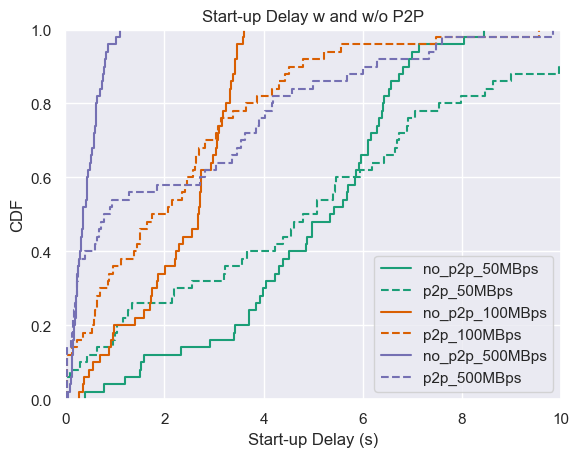

In [295]:
colors = mpl.colormaps['Dark2'].colors
for i, peer in enumerate(peers):
  if 'no_p2p' in peer.columns:
    plt.ecdf(peer['start_up_delay'], label=f'no_p2p_{int(int(peer.columns[4]) / 1000)}MBps', color=colors[int(i/2)])
  else:
    line = plt.ecdf(peer['start_up_delay'], label=f'p2p_{int(int(peer.columns[4]) / 1000)}MBps', color=colors[int(i/2)])
    line.set(linestyle='--')

plt.legend()
plt.title('Start-up Delay w and w/o P2P')
plt.ylabel('CDF')
plt.xlabel('Start-up Delay (s)')
plt.xlim(0, 10)
plt.show()

In [290]:
peers[0].head()

,t,clt_addr,start_up_delay,no_p2p,50000,s
0,1.733427e+09,"('127.0.0.1', 34330)",0.391270,0,NaN,0.0
1,1.733427e+09,"('127.0.0.1', 50094)",1.584277,0,NaN,1.0
2,1.733427e+09,"('127.0.0.1', 45536)",2.332660,0,NaN,1.0
3,1.733427e+09,"('127.0.0.1', 49725)",2.922057,0,NaN,2.0
4,1.733427e+09,"('127.0.0.1', 39204)",3.712303,0,NaN,3.0


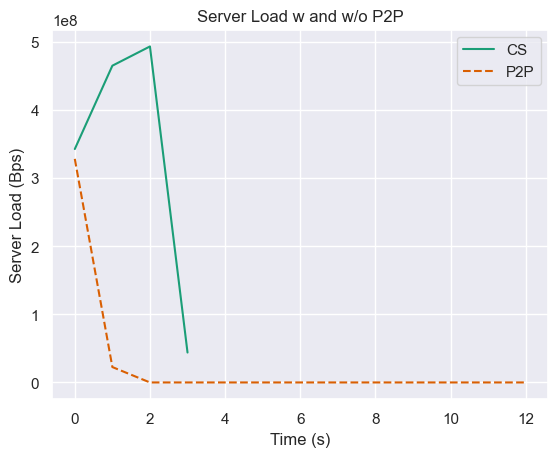

In [27]:
colors = mpl.colormaps['Dark2'].colors
for i, srv in enumerate(srvs):
  if 'CS' in srv.columns:
    grouped = srv.groupby('s')['bytes'].sum().plot(label=f'CS', color=colors[int(i)])
  else:
    grouped = srv.groupby('s')['bytes'].sum().plot(label=f'P2P', style='--', color=colors[int(i)])

plt.legend()
plt.title('Server Load w and w/o P2P')
plt.ylabel('Server Load (Bps)')
plt.xlabel('Time (s)')
plt.show()

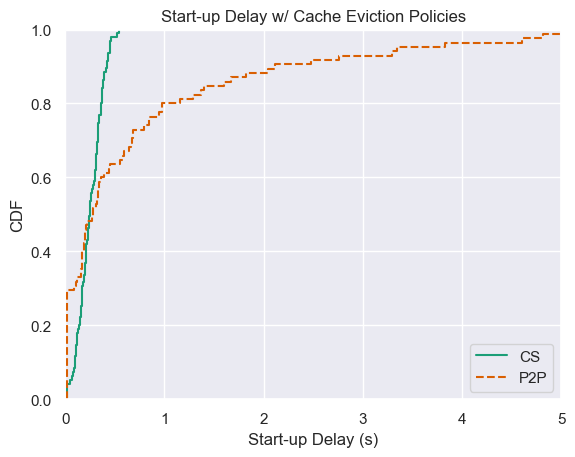

In [28]:
colors = mpl.colormaps['Dark2'].colors
for i, peer in enumerate(peers):
  if 'CS' in peer.columns:
    plt.ecdf(peer['start_up_delay'], label=f'CS', color=colors[int(i)])
  else:
    line = plt.ecdf(peer['start_up_delay'], label=f'P2P', color=colors[int(i)])
    line.set(linestyle='--')

plt.legend()
plt.title('Start-up Delay w/ Cache Eviction Policies')
plt.ylabel('CDF')
plt.xlabel('Start-up Delay (s)')
plt.xlim(0, 5)
plt.show()